In [1]:
import sys
sys.path.append('../../')
import ipywidgets as widgets
from IPython.display import display
import stackview
import datetime

import ailoc.deeploc
import ailoc.common
ailoc.common.setup_seed(42)

%matplotlib inline

## 1. Set the paths of DeepLoc model, images, predictions and analyzer parameters. 

In [2]:
deeploc_analyzer_param_widget = ailoc.common.DeepLocSetAnalyzerParamWidget()
deeploc_analyzer_param_widget.display_notebook_gui()

SelectFilesButton(description='Select DeepLoc model', icon='square-o', layout=Layout(height='80px', width='100…

Checkbox(value=True, description='Select all tiff files under the folder', indent=False)

SelectFilesButton(description='Select tiff file', icon='square-o', layout=Layout(height='80px', width='100%'),…

SaveFilesButton(description='Save predicted CSV', icon='square-o', layout=Layout(height='80px', width='100%'),…

GridspecLayout(children=(BoundedIntText(value=1, description='Block(GB)', layout=Layout(grid_area='widget001')…

Button(description='OK', style=ButtonStyle())

Output()

## 2. Run the code cell to initialize the DeepLoc analyzer

In [3]:
deeploc_analyzer = ailoc.common.SmlmDataAnalyzer(loc_model=deeploc_analyzer_param_widget.analyzer_param['deeploc_model'],
                                                 tiff_path=deeploc_analyzer_param_widget.analyzer_param['tiff_path'],
                                                 output_path=deeploc_analyzer_param_widget.analyzer_param['output_path'],
                                                 time_block_gb=deeploc_analyzer_param_widget.analyzer_param['time_block_gb'],
                                                 batch_size=deeploc_analyzer_param_widget.analyzer_param['batch_size'],
                                                 sub_fov_size=deeploc_analyzer_param_widget.analyzer_param['sub_fov_size'],
                                                 over_cut=deeploc_analyzer_param_widget.analyzer_param['over_cut'],
                                                 num_workers=deeploc_analyzer_param_widget.analyzer_param['num_workers'])

<tifffile.TiffTag 270 @491320> coercing invalid ASCII to bytes, due to UnicodeDecodeError('charmap', b'\x83\x00\x90\x00\x83\x00\x8b\x00\x80\x00\x93\x00x\x00x\x00\x81\x00\x86\x00\x81\x00\xa9\x00\x8c\x00\x8d\x00\x8d\x00\x8d\x00\x8a\x00\x86\x00~\x00\x92\x00\x88\x00\x84\x00\x8a\x00\x97\x00\x8a\x00\x8c\x00\x88\x00\x86\x00\x83\x00\x89\x00~\x00\x8c\x00\x80\x00{\x00\x87\x00\x95\x00\x8a\x00\x88\x00\x90\x00\x94', 2, 3, 'character maps to <undefined>')


the file to save the predictions is: E:/projects/FS_work/AI-Loc/AI-Loc_project/results/2023-10-18-16DeepLoc_NPC_NUP96_SNAP647_DMO_6um_defoucs_0_20ms_3_predictions.csv


<tifffile.TiffTag 270 @491320> coercing invalid ASCII to bytes, due to UnicodeDecodeError('charmap', b'\x00\x83\x00~\x00\x8b\x00\x8f\x00\x86\x00\x86\x00\x90\x00\x81\x00\x91\x00\x8a\x00\x8d\x00\x87\x00\x8d\x00\x89\x00\x84\x00\x86\x00\x8c\x00\x95\x00\x9a\x00\x8b\x00\x91\x00\x88\x00\x82\x00\x84\x00\x7f\x00\x8d\x00\x8c\x00\x8d\x00\x8c\x00\x84\x00\x8a\x00\x8e\x00}\x00\x93\x00\x87\x00\x96\x00\x86\x00\x91\x00\x92', 7, 8, 'character maps to <undefined>')
<tifffile.TiffTag 270 @491320> coercing invalid ASCII to bytes, due to UnicodeDecodeError('charmap', b'\x00x\x00{\x00\x8a\x00\x89\x00\x88\x00\x81\x00\x89\x00\x8a\x00\x8b\x00~\x00\x91\x00\x89\x00\x8a\x00\x87\x00\x80\x00\x9d\x00\x91\x00\x8a\x00~\x00\x8d\x00\x8c\x00\x93\x00\x97\x00\x8e\x00\x8e\x00\x87\x00\x86\x00\x90\x00\x89\x00\x92\x00\x8b\x00\x8b\x00\x8a\x00\x83\x00\x8a\x00\x83\x00\x86\x00\x8c\x00\x8b', 11, 12, 'character maps to <undefined>')
<tifffile.TiffTag 270 @491320> coercing invalid ASCII to bytes, due to UnicodeDecodeError('charmap', b

frame ranges || filename: 
[0-22344] || E:\projects\FS_work\AI-Loc\AI-Loc_project\datasets\fy_npc6um_1\NPC_NUP96_SNAP647_DMO_6um_defoucs_0_20ms_3\NPC_NUP96_SNAP647_DMO_6um_defoucs_0_20ms_3_MMStack_Pos0.ome.tif
[22345-44688] || E:\projects\FS_work\AI-Loc\AI-Loc_project\datasets\fy_npc6um_1\NPC_NUP96_SNAP647_DMO_6um_defoucs_0_20ms_3\NPC_NUP96_SNAP647_DMO_6um_defoucs_0_20ms_3_MMStack_Pos0_1.ome.tif
[44689-67032] || E:\projects\FS_work\AI-Loc\AI-Loc_project\datasets\fy_npc6um_1\NPC_NUP96_SNAP647_DMO_6um_defoucs_0_20ms_3\NPC_NUP96_SNAP647_DMO_6um_defoucs_0_20ms_3_MMStack_Pos0_2.ome.tif
[67033-89376] || E:\projects\FS_work\AI-Loc\AI-Loc_project\datasets\fy_npc6um_1\NPC_NUP96_SNAP647_DMO_6um_defoucs_0_20ms_3\NPC_NUP96_SNAP647_DMO_6um_defoucs_0_20ms_3_MMStack_Pos0_3.ome.tif
[89377-99999] || E:\projects\FS_work\AI-Loc\AI-Loc_project\datasets\fy_npc6um_1\NPC_NUP96_SNAP647_DMO_6um_defoucs_0_20ms_3\NPC_NUP96_SNAP647_DMO_6um_defoucs_0_20ms_3_MMStack_Pos0_4.ome.tif


## 3. Check the output of a specific frame

In [4]:
frame_num_widget = widgets.HBox([widgets.Label(value='Input the frame number:'), widgets.BoundedIntText(value=0, min=0, max=deeploc_analyzer.tiff_dataset.sum_file_length-1, step=1,)])
out = widgets.interactive_output(deeploc_analyzer.check_single_frame_output, {'frame_num': frame_num_widget.children[1]})

display(widgets.VBox([frame_num_widget, out]))

## 4. Run the code cell to analyze the data  

<tifffile.TiffTag 270 @491320> coercing invalid ASCII to bytes, due to UnicodeDecodeError('charmap', b'\x83\x00\x90\x00\x83\x00\x8b\x00\x80\x00\x93\x00x\x00x\x00\x81\x00\x86\x00\x81\x00\xa9\x00\x8c\x00\x8d\x00\x8d\x00\x8d\x00\x8a\x00\x86\x00~\x00\x92\x00\x88\x00\x84\x00\x8a\x00\x97\x00\x8a\x00\x8c\x00\x88\x00\x86\x00\x83\x00\x89\x00~\x00\x8c\x00\x80\x00{\x00\x87\x00\x95\x00\x8a\x00\x88\x00\x90\x00\x94', 2, 3, 'character maps to <undefined>')


Analyzing block: 1/17, contain frames: 6128, already analyzed: 0/100000, ETA: inf min
Processing sub-FOV: 4/4, (240, 295, 240, 295), keep molecules in: (256, 295, 256, 295), loc model: <class 'ailoc.deeploc.deeploc.DeepLoc'>


<tifffile.TiffTag 270 @491320> coercing invalid ASCII to bytes, due to UnicodeDecodeError('charmap', b'\x83\x00\x90\x00\x83\x00\x8b\x00\x80\x00\x93\x00x\x00x\x00\x81\x00\x86\x00\x81\x00\xa9\x00\x8c\x00\x8d\x00\x8d\x00\x8d\x00\x8a\x00\x86\x00~\x00\x92\x00\x88\x00\x84\x00\x8a\x00\x97\x00\x8a\x00\x8c\x00\x88\x00\x86\x00\x83\x00\x89\x00~\x00\x8c\x00\x80\x00{\x00\x87\x00\x95\x00\x8a\x00\x88\x00\x90\x00\x94', 2, 3, 'character maps to <undefined>')


Analyzing block: 2/17, contain frames: 6128, already analyzed: 6128/100000, ETA: 43.39 min
Processing sub-FOV: 4/4, (240, 295, 240, 295), keep molecules in: (256, 295, 256, 295), loc model: <class 'ailoc.deeploc.deeploc.DeepLoc'>


<tifffile.TiffTag 270 @491320> coercing invalid ASCII to bytes, due to UnicodeDecodeError('charmap', b'\x83\x00\x90\x00\x83\x00\x8b\x00\x80\x00\x93\x00x\x00x\x00\x81\x00\x86\x00\x81\x00\xa9\x00\x8c\x00\x8d\x00\x8d\x00\x8d\x00\x8a\x00\x86\x00~\x00\x92\x00\x88\x00\x84\x00\x8a\x00\x97\x00\x8a\x00\x8c\x00\x88\x00\x86\x00\x83\x00\x89\x00~\x00\x8c\x00\x80\x00{\x00\x87\x00\x95\x00\x8a\x00\x88\x00\x90\x00\x94', 2, 3, 'character maps to <undefined>')


Analyzing block: 3/17, contain frames: 6128, already analyzed: 12256/100000, ETA: 38.29 min
Processing sub-FOV: 4/4, (240, 295, 240, 295), keep molecules in: (256, 295, 256, 295), loc model: <class 'ailoc.deeploc.deeploc.DeepLoc'>


<tifffile.TiffTag 270 @491320> coercing invalid ASCII to bytes, due to UnicodeDecodeError('charmap', b'\x83\x00\x90\x00\x83\x00\x8b\x00\x80\x00\x93\x00x\x00x\x00\x81\x00\x86\x00\x81\x00\xa9\x00\x8c\x00\x8d\x00\x8d\x00\x8d\x00\x8a\x00\x86\x00~\x00\x92\x00\x88\x00\x84\x00\x8a\x00\x97\x00\x8a\x00\x8c\x00\x88\x00\x86\x00\x83\x00\x89\x00~\x00\x8c\x00\x80\x00{\x00\x87\x00\x95\x00\x8a\x00\x88\x00\x90\x00\x94', 2, 3, 'character maps to <undefined>')
<tifffile.TiffTag 270 @491320> coercing invalid ASCII to bytes, due to UnicodeDecodeError('charmap', b'\x00\x83\x00~\x00\x8b\x00\x8f\x00\x86\x00\x86\x00\x90\x00\x81\x00\x91\x00\x8a\x00\x8d\x00\x87\x00\x8d\x00\x89\x00\x84\x00\x86\x00\x8c\x00\x95\x00\x9a\x00\x8b\x00\x91\x00\x88\x00\x82\x00\x84\x00\x7f\x00\x8d\x00\x8c\x00\x8d\x00\x8c\x00\x84\x00\x8a\x00\x8e\x00}\x00\x93\x00\x87\x00\x96\x00\x86\x00\x91\x00\x92', 7, 8, 'character maps to <undefined>')


Analyzing block: 4/17, contain frames: 6128, already analyzed: 18384/100000, ETA: 34.40 min
Processing sub-FOV: 4/4, (240, 295, 240, 295), keep molecules in: (256, 295, 256, 295), loc model: <class 'ailoc.deeploc.deeploc.DeepLoc'>


<tifffile.TiffTag 270 @491320> coercing invalid ASCII to bytes, due to UnicodeDecodeError('charmap', b'\x00\x83\x00~\x00\x8b\x00\x8f\x00\x86\x00\x86\x00\x90\x00\x81\x00\x91\x00\x8a\x00\x8d\x00\x87\x00\x8d\x00\x89\x00\x84\x00\x86\x00\x8c\x00\x95\x00\x9a\x00\x8b\x00\x91\x00\x88\x00\x82\x00\x84\x00\x7f\x00\x8d\x00\x8c\x00\x8d\x00\x8c\x00\x84\x00\x8a\x00\x8e\x00}\x00\x93\x00\x87\x00\x96\x00\x86\x00\x91\x00\x92', 7, 8, 'character maps to <undefined>')


Analyzing block: 5/17, contain frames: 6128, already analyzed: 24512/100000, ETA: 31.73 min
Processing sub-FOV: 4/4, (240, 295, 240, 295), keep molecules in: (256, 295, 256, 295), loc model: <class 'ailoc.deeploc.deeploc.DeepLoc'>


<tifffile.TiffTag 270 @491320> coercing invalid ASCII to bytes, due to UnicodeDecodeError('charmap', b'\x00\x83\x00~\x00\x8b\x00\x8f\x00\x86\x00\x86\x00\x90\x00\x81\x00\x91\x00\x8a\x00\x8d\x00\x87\x00\x8d\x00\x89\x00\x84\x00\x86\x00\x8c\x00\x95\x00\x9a\x00\x8b\x00\x91\x00\x88\x00\x82\x00\x84\x00\x7f\x00\x8d\x00\x8c\x00\x8d\x00\x8c\x00\x84\x00\x8a\x00\x8e\x00}\x00\x93\x00\x87\x00\x96\x00\x86\x00\x91\x00\x92', 7, 8, 'character maps to <undefined>')


Analyzing block: 6/17, contain frames: 6128, already analyzed: 30640/100000, ETA: 29.19 min
Processing sub-FOV: 4/4, (240, 295, 240, 295), keep molecules in: (256, 295, 256, 295), loc model: <class 'ailoc.deeploc.deeploc.DeepLoc'>


<tifffile.TiffTag 270 @491320> coercing invalid ASCII to bytes, due to UnicodeDecodeError('charmap', b'\x00\x83\x00~\x00\x8b\x00\x8f\x00\x86\x00\x86\x00\x90\x00\x81\x00\x91\x00\x8a\x00\x8d\x00\x87\x00\x8d\x00\x89\x00\x84\x00\x86\x00\x8c\x00\x95\x00\x9a\x00\x8b\x00\x91\x00\x88\x00\x82\x00\x84\x00\x7f\x00\x8d\x00\x8c\x00\x8d\x00\x8c\x00\x84\x00\x8a\x00\x8e\x00}\x00\x93\x00\x87\x00\x96\x00\x86\x00\x91\x00\x92', 7, 8, 'character maps to <undefined>')


Analyzing block: 7/17, contain frames: 6128, already analyzed: 36768/100000, ETA: 27.13 min
Processing sub-FOV: 4/4, (240, 295, 240, 295), keep molecules in: (256, 295, 256, 295), loc model: <class 'ailoc.deeploc.deeploc.DeepLoc'>


<tifffile.TiffTag 270 @491320> coercing invalid ASCII to bytes, due to UnicodeDecodeError('charmap', b'\x00\x83\x00~\x00\x8b\x00\x8f\x00\x86\x00\x86\x00\x90\x00\x81\x00\x91\x00\x8a\x00\x8d\x00\x87\x00\x8d\x00\x89\x00\x84\x00\x86\x00\x8c\x00\x95\x00\x9a\x00\x8b\x00\x91\x00\x88\x00\x82\x00\x84\x00\x7f\x00\x8d\x00\x8c\x00\x8d\x00\x8c\x00\x84\x00\x8a\x00\x8e\x00}\x00\x93\x00\x87\x00\x96\x00\x86\x00\x91\x00\x92', 7, 8, 'character maps to <undefined>')
<tifffile.TiffTag 270 @491320> coercing invalid ASCII to bytes, due to UnicodeDecodeError('charmap', b'\x00x\x00{\x00\x8a\x00\x89\x00\x88\x00\x81\x00\x89\x00\x8a\x00\x8b\x00~\x00\x91\x00\x89\x00\x8a\x00\x87\x00\x80\x00\x9d\x00\x91\x00\x8a\x00~\x00\x8d\x00\x8c\x00\x93\x00\x97\x00\x8e\x00\x8e\x00\x87\x00\x86\x00\x90\x00\x89\x00\x92\x00\x8b\x00\x8b\x00\x8a\x00\x83\x00\x8a\x00\x83\x00\x86\x00\x8c\x00\x8b', 11, 12, 'character maps to <undefined>')


Analyzing block: 8/17, contain frames: 6128, already analyzed: 42896/100000, ETA: 24.66 min
Processing sub-FOV: 4/4, (240, 295, 240, 295), keep molecules in: (256, 295, 256, 295), loc model: <class 'ailoc.deeploc.deeploc.DeepLoc'>


<tifffile.TiffTag 270 @491320> coercing invalid ASCII to bytes, due to UnicodeDecodeError('charmap', b'\x00x\x00{\x00\x8a\x00\x89\x00\x88\x00\x81\x00\x89\x00\x8a\x00\x8b\x00~\x00\x91\x00\x89\x00\x8a\x00\x87\x00\x80\x00\x9d\x00\x91\x00\x8a\x00~\x00\x8d\x00\x8c\x00\x93\x00\x97\x00\x8e\x00\x8e\x00\x87\x00\x86\x00\x90\x00\x89\x00\x92\x00\x8b\x00\x8b\x00\x8a\x00\x83\x00\x8a\x00\x83\x00\x86\x00\x8c\x00\x8b', 11, 12, 'character maps to <undefined>')


Analyzing block: 9/17, contain frames: 6128, already analyzed: 49024/100000, ETA: 22.09 min
Processing sub-FOV: 4/4, (240, 295, 240, 295), keep molecules in: (256, 295, 256, 295), loc model: <class 'ailoc.deeploc.deeploc.DeepLoc'>


<tifffile.TiffTag 270 @491320> coercing invalid ASCII to bytes, due to UnicodeDecodeError('charmap', b'\x00x\x00{\x00\x8a\x00\x89\x00\x88\x00\x81\x00\x89\x00\x8a\x00\x8b\x00~\x00\x91\x00\x89\x00\x8a\x00\x87\x00\x80\x00\x9d\x00\x91\x00\x8a\x00~\x00\x8d\x00\x8c\x00\x93\x00\x97\x00\x8e\x00\x8e\x00\x87\x00\x86\x00\x90\x00\x89\x00\x92\x00\x8b\x00\x8b\x00\x8a\x00\x83\x00\x8a\x00\x83\x00\x86\x00\x8c\x00\x8b', 11, 12, 'character maps to <undefined>')


Analyzing block: 10/17, contain frames: 6128, already analyzed: 55152/100000, ETA: 19.87 min
Processing sub-FOV: 4/4, (240, 295, 240, 295), keep molecules in: (256, 295, 256, 295), loc model: <class 'ailoc.deeploc.deeploc.DeepLoc'>


<tifffile.TiffTag 270 @491320> coercing invalid ASCII to bytes, due to UnicodeDecodeError('charmap', b'\x00x\x00{\x00\x8a\x00\x89\x00\x88\x00\x81\x00\x89\x00\x8a\x00\x8b\x00~\x00\x91\x00\x89\x00\x8a\x00\x87\x00\x80\x00\x9d\x00\x91\x00\x8a\x00~\x00\x8d\x00\x8c\x00\x93\x00\x97\x00\x8e\x00\x8e\x00\x87\x00\x86\x00\x90\x00\x89\x00\x92\x00\x8b\x00\x8b\x00\x8a\x00\x83\x00\x8a\x00\x83\x00\x86\x00\x8c\x00\x8b', 11, 12, 'character maps to <undefined>')
<tifffile.TiffTag 270 @491320> coercing invalid ASCII to bytes, due to UnicodeDecodeError('charmap', b'\x00\x85\x00\x8a\x00\x8d\x00\x92\x00\x83\x00\x83\x00{\x00\x86\x00\x80\x00\x82\x00\x7f\x00\x97\x00\x90\x00\x85\x00\x8d\x00\x89\x00\x88\x00\x86\x00\x88\x00\x88\x00\x87\x00\x8b\x00\x84\x00\x93\x00\x83\x00}\x00\x92\x00\x82\x00\x89\x00\x8a\x00\x88\x00{\x00\x8c\x00\x8b\x00}\x00\x83\x00}\x00{\x00\x80', 5, 6, 'character maps to <undefined>')


Analyzing block: 11/17, contain frames: 6128, already analyzed: 61280/100000, ETA: 17.34 min
Processing sub-FOV: 4/4, (240, 295, 240, 295), keep molecules in: (256, 295, 256, 295), loc model: <class 'ailoc.deeploc.deeploc.DeepLoc'>


<tifffile.TiffTag 270 @491320> coercing invalid ASCII to bytes, due to UnicodeDecodeError('charmap', b'\x00\x85\x00\x8a\x00\x8d\x00\x92\x00\x83\x00\x83\x00{\x00\x86\x00\x80\x00\x82\x00\x7f\x00\x97\x00\x90\x00\x85\x00\x8d\x00\x89\x00\x88\x00\x86\x00\x88\x00\x88\x00\x87\x00\x8b\x00\x84\x00\x93\x00\x83\x00}\x00\x92\x00\x82\x00\x89\x00\x8a\x00\x88\x00{\x00\x8c\x00\x8b\x00}\x00\x83\x00}\x00{\x00\x80', 5, 6, 'character maps to <undefined>')


Analyzing block: 12/17, contain frames: 6128, already analyzed: 67408/100000, ETA: 14.88 min
Processing sub-FOV: 4/4, (240, 295, 240, 295), keep molecules in: (256, 295, 256, 295), loc model: <class 'ailoc.deeploc.deeploc.DeepLoc'>


<tifffile.TiffTag 270 @491320> coercing invalid ASCII to bytes, due to UnicodeDecodeError('charmap', b'\x00\x85\x00\x8a\x00\x8d\x00\x92\x00\x83\x00\x83\x00{\x00\x86\x00\x80\x00\x82\x00\x7f\x00\x97\x00\x90\x00\x85\x00\x8d\x00\x89\x00\x88\x00\x86\x00\x88\x00\x88\x00\x87\x00\x8b\x00\x84\x00\x93\x00\x83\x00}\x00\x92\x00\x82\x00\x89\x00\x8a\x00\x88\x00{\x00\x8c\x00\x8b\x00}\x00\x83\x00}\x00{\x00\x80', 5, 6, 'character maps to <undefined>')


Analyzing block: 13/17, contain frames: 6128, already analyzed: 73536/100000, ETA: 12.41 min
Processing sub-FOV: 4/4, (240, 295, 240, 295), keep molecules in: (256, 295, 256, 295), loc model: <class 'ailoc.deeploc.deeploc.DeepLoc'>


<tifffile.TiffTag 270 @491320> coercing invalid ASCII to bytes, due to UnicodeDecodeError('charmap', b'\x00\x85\x00\x8a\x00\x8d\x00\x92\x00\x83\x00\x83\x00{\x00\x86\x00\x80\x00\x82\x00\x7f\x00\x97\x00\x90\x00\x85\x00\x8d\x00\x89\x00\x88\x00\x86\x00\x88\x00\x88\x00\x87\x00\x8b\x00\x84\x00\x93\x00\x83\x00}\x00\x92\x00\x82\x00\x89\x00\x8a\x00\x88\x00{\x00\x8c\x00\x8b\x00}\x00\x83\x00}\x00{\x00\x80', 5, 6, 'character maps to <undefined>')


Analyzing block: 14/17, contain frames: 6128, already analyzed: 79664/100000, ETA: 9.97 min
Processing sub-FOV: 4/4, (240, 295, 240, 295), keep molecules in: (256, 295, 256, 295), loc model: <class 'ailoc.deeploc.deeploc.DeepLoc'>


<tifffile.TiffTag 270 @491320> coercing invalid ASCII to bytes, due to UnicodeDecodeError('charmap', b'\x00\x85\x00\x8a\x00\x8d\x00\x92\x00\x83\x00\x83\x00{\x00\x86\x00\x80\x00\x82\x00\x7f\x00\x97\x00\x90\x00\x85\x00\x8d\x00\x89\x00\x88\x00\x86\x00\x88\x00\x88\x00\x87\x00\x8b\x00\x84\x00\x93\x00\x83\x00}\x00\x92\x00\x82\x00\x89\x00\x8a\x00\x88\x00{\x00\x8c\x00\x8b\x00}\x00\x83\x00}\x00{\x00\x80', 5, 6, 'character maps to <undefined>')


Analyzing block: 15/17, contain frames: 6128, already analyzed: 85792/100000, ETA: 7.42 min
Processing sub-FOV: 4/4, (240, 295, 240, 295), keep molecules in: (256, 295, 256, 295), loc model: <class 'ailoc.deeploc.deeploc.DeepLoc'>
Analyzing block: 16/17, contain frames: 6128, already analyzed: 91920/100000, ETA: 4.95 min
Processing sub-FOV: 4/4, (240, 295, 240, 295), keep molecules in: (256, 295, 256, 295), loc model: <class 'ailoc.deeploc.deeploc.DeepLoc'>
Analyzing block: 17/17, contain frames: 1952, already analyzed: 98048/100000, ETA: 2.47 min
Processing sub-FOV: 4/4, (240, 295, 240, 295), keep molecules in: (256, 295, 256, 295), loc model: <class 'ailoc.deeploc.deeploc.DeepLoc'>
resample the xy offsets to avoid grid artifacts in the difficult conditions (low SNR, high density, etc.) replace the original xnm and ynm with x_rescale and y_rescale


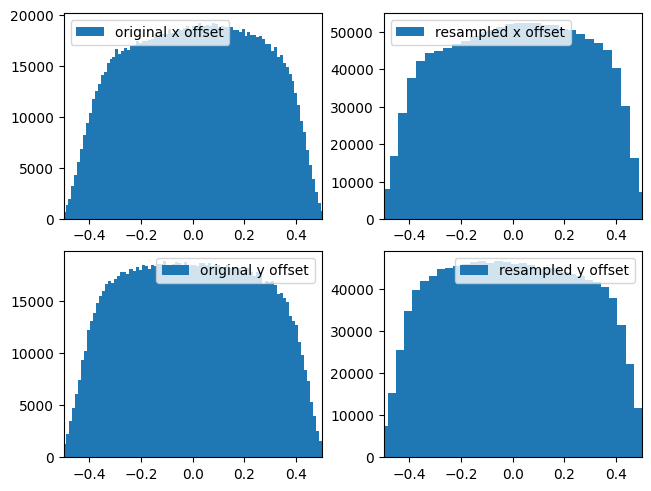

resample finished, time cost (min): 0.25
the file to save the predictions is: E:/projects/FS_work/AI-Loc/AI-Loc_project/results/2023-10-18-16DeepLoc_NPC_NUP96_SNAP647_DMO_6um_defoucs_0_20ms_3_predictions_resample.csv


In [5]:
preds_array, preds_rescale_array = deeploc_analyzer.divide_and_conquer()